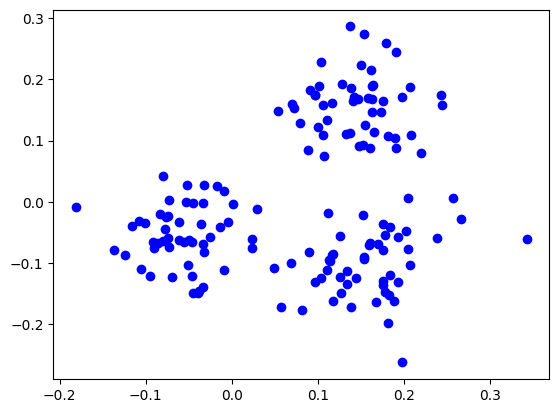

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(42)

c1 = np.random.normal(-0.05, 0.05, (50, 2))
c2 = np.random.normal(0.15, 0.05, (50, 2))
c3 = np.column_stack([
    np.random.normal(0.15, 0.05, 50),
    np.random.normal(-0.1, 0.05, 50)
])

plt.scatter(c1[:,0], c1[:,1], c='blue')
plt.scatter(c2[:,0], c2[:,1], c='blue')
plt.scatter(c3[:,0], c3[:,1], c='blue')
plt.show()

x = np.concatenate([c1[:,0], c2[:,0], c3[:,0]])
y = np.concatenate([c1[:,1], c2[:,1], c3[:,1]])

data = np.column_stack([x, y])

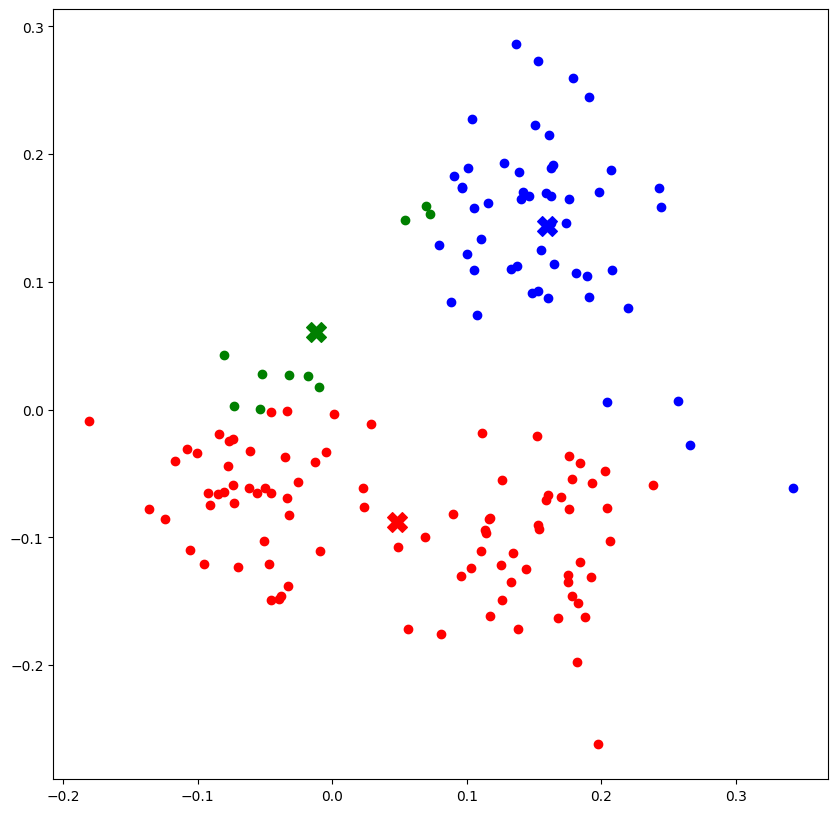

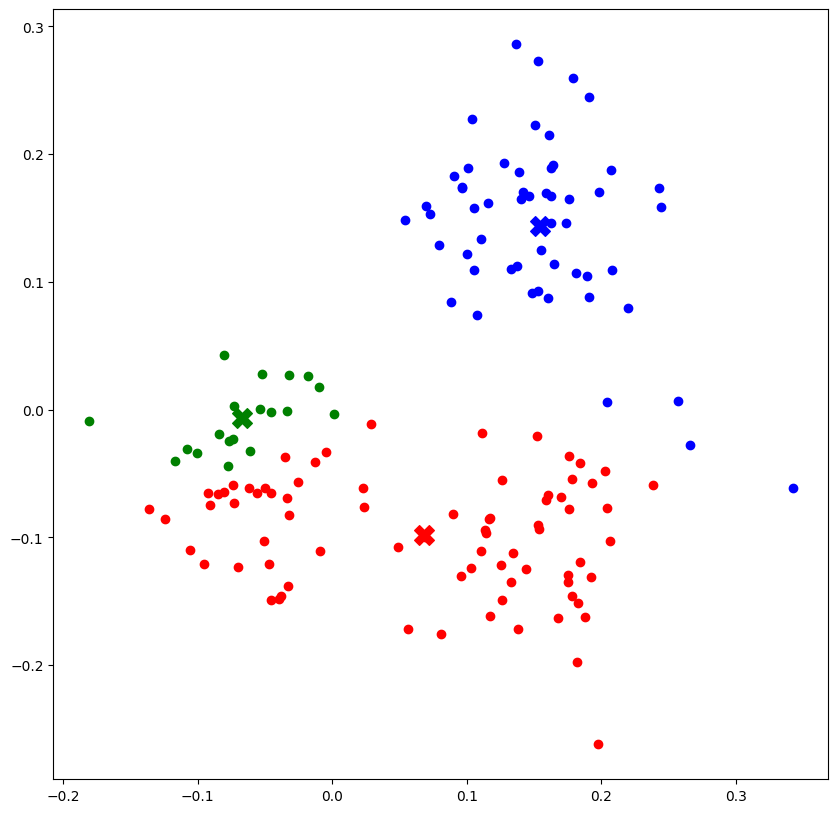

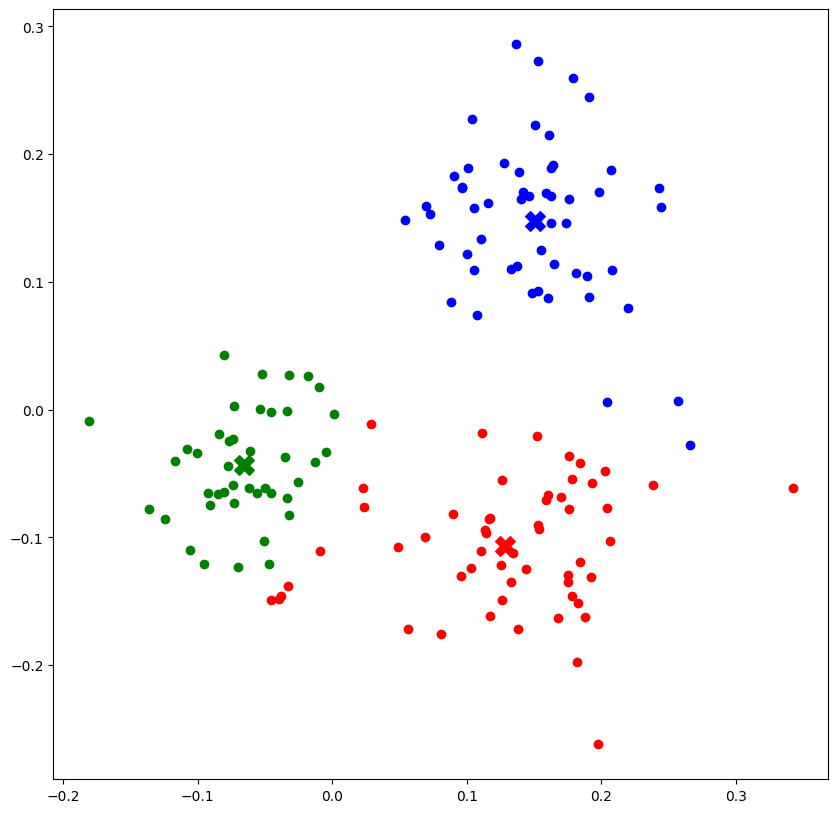

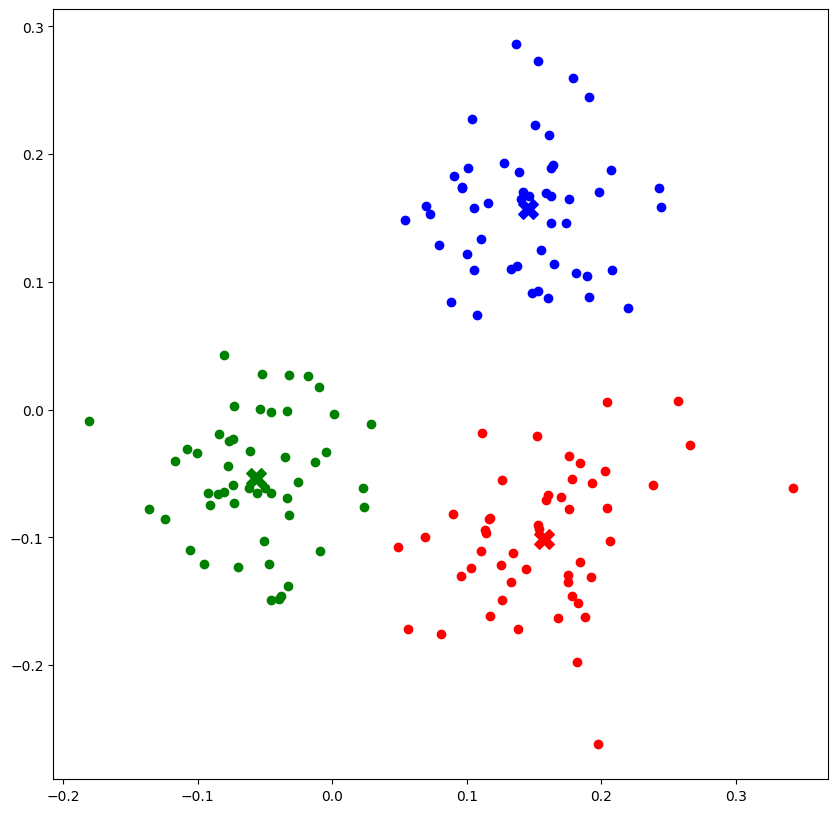

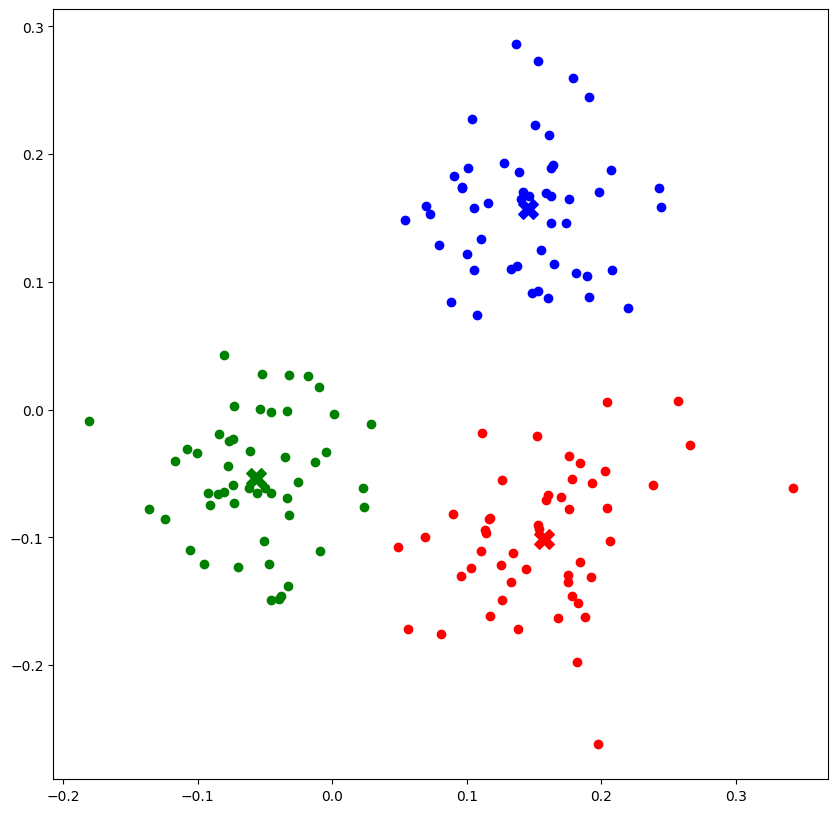

In [40]:
def compute_euclidean(point: np.ndarray, centroid: np.ndarray):
    return np.sqrt(np.sum((point - centroid) ** 2))


def find_nearest(point: np.ndarray, centroids: np.ndarray):
    distances = [compute_euclidean(point, centroid) for centroid in centroids]

    return np.argmin(distances)

def assign_clusters(data: np.ndarray, centroids: np.ndarray):
    return np.asarray([find_nearest(point, centroids) for point in data])

def compute_centroids(data, assignment):
    return np.asarray([np.mean(data[assignment == cluster], axis=0) for cluster in np.unique(assignment)])

def plot_kmeans(data: np.ndarray, assignment: np.ndarray, centroids: np.ndarray):
    colours = ['red', 'blue', 'green', 'purple']
    fig = plt.figure(figsize=(10, 10))

    for i, centroid in enumerate(centroids):
        points = data[assignment == i]
        plt.scatter(points[:,0], points[:,1], c=colours[i])
        plt.scatter(centroids[i:i+1,0], centroids[i:i+1,1], c=colours[i], marker='X', s=200)
    plt.show()

def kmeans(data: np.ndarray, centroids: np.ndarray, visualize: bool = False):
    history = {
        'centroids': [],
        'assignments': []
    }
    assignment = None

    while assignment is None or prev_assignment is None or not np.array_equal(prev_assignment, assignment):
        prev_assignment = assignment
        assignment = assign_clusters(data, centroids)
        centroids = compute_centroids(data, assignment)

        history['centroids'].append(centroids)
        history['assignments'].append(assignment)

        if visualize:
            plot_kmeans(data, assignment, centroids)

    return history

centroids = np.asarray([
    [0.05, -0.1],
    [0.1, 0.1],
    [0.05, 0.1]
])

history = kmeans(data, centroids, visualize=True)

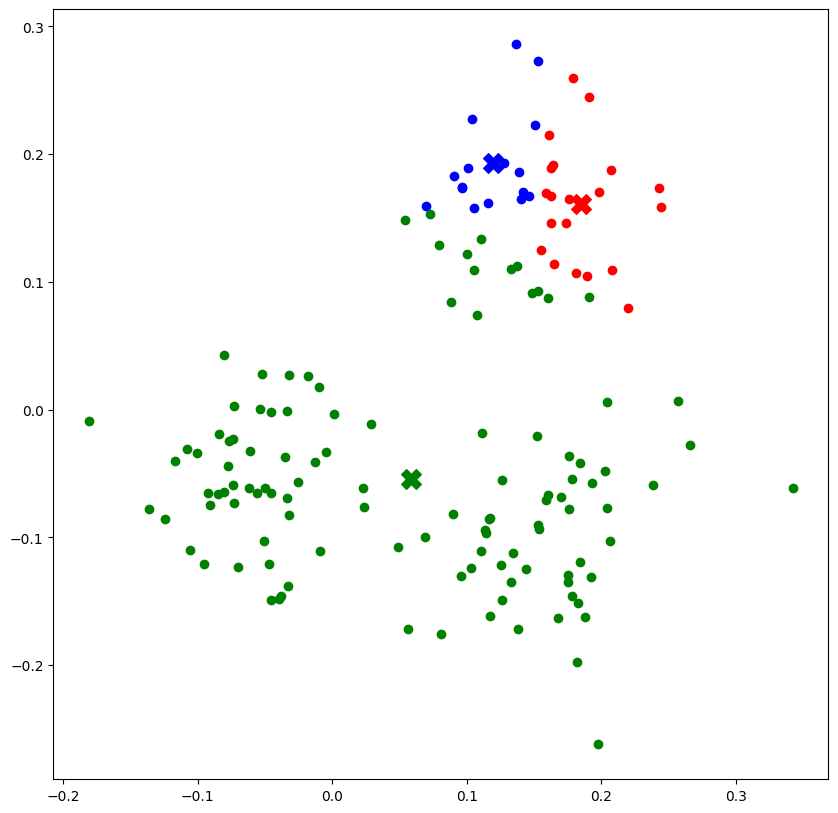

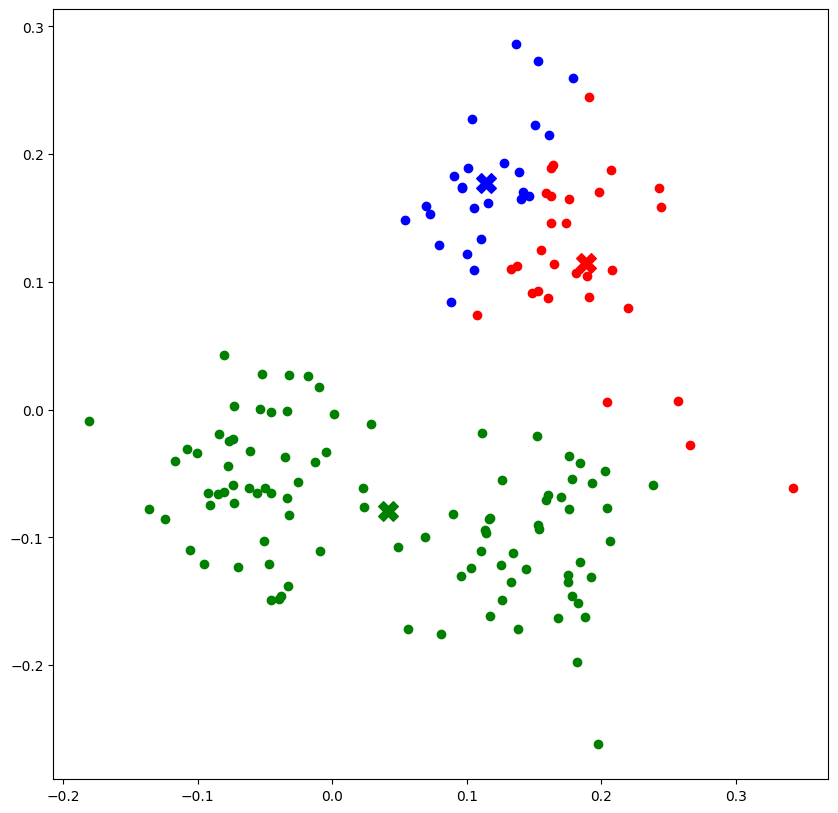

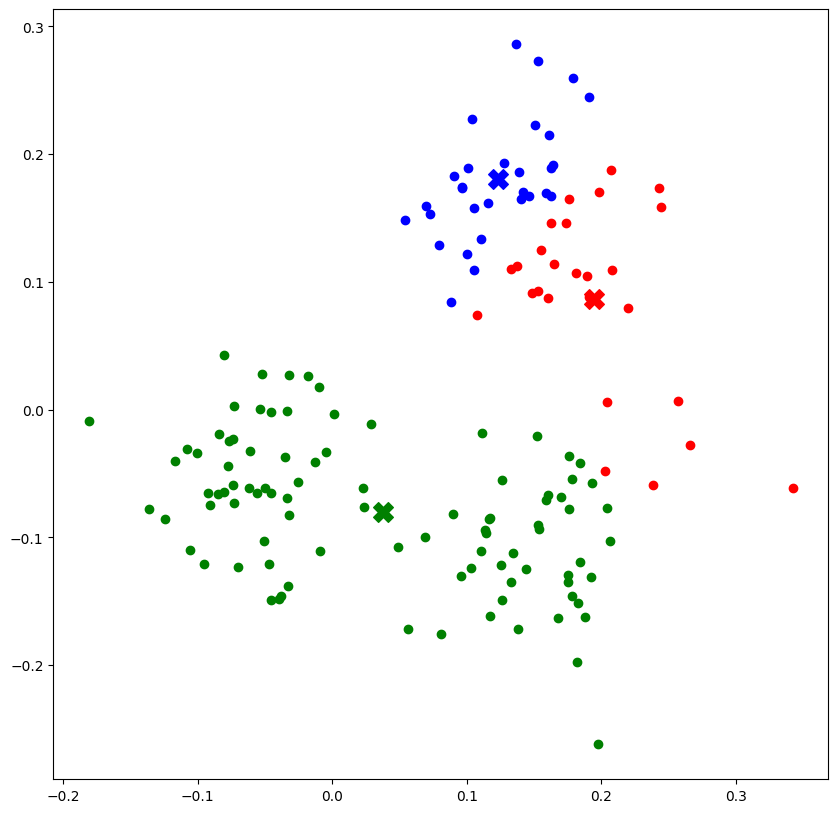

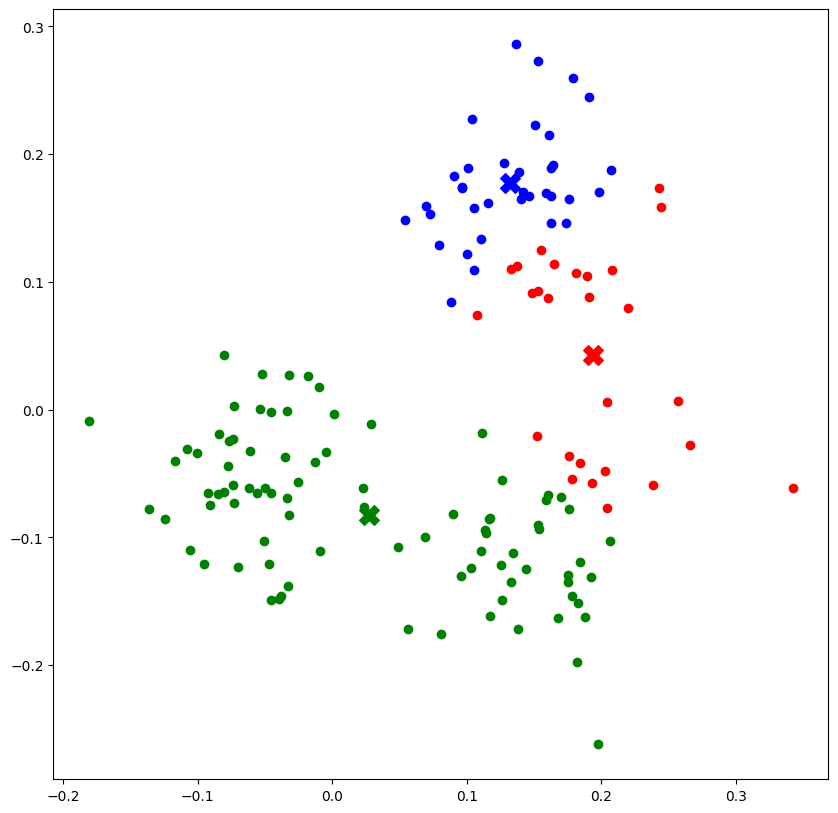

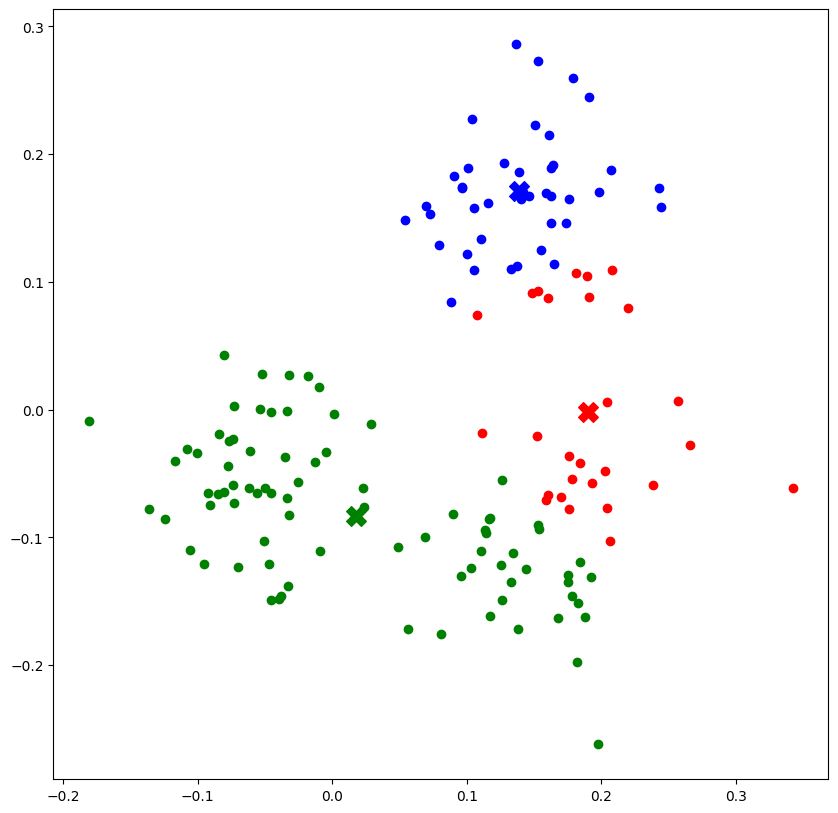

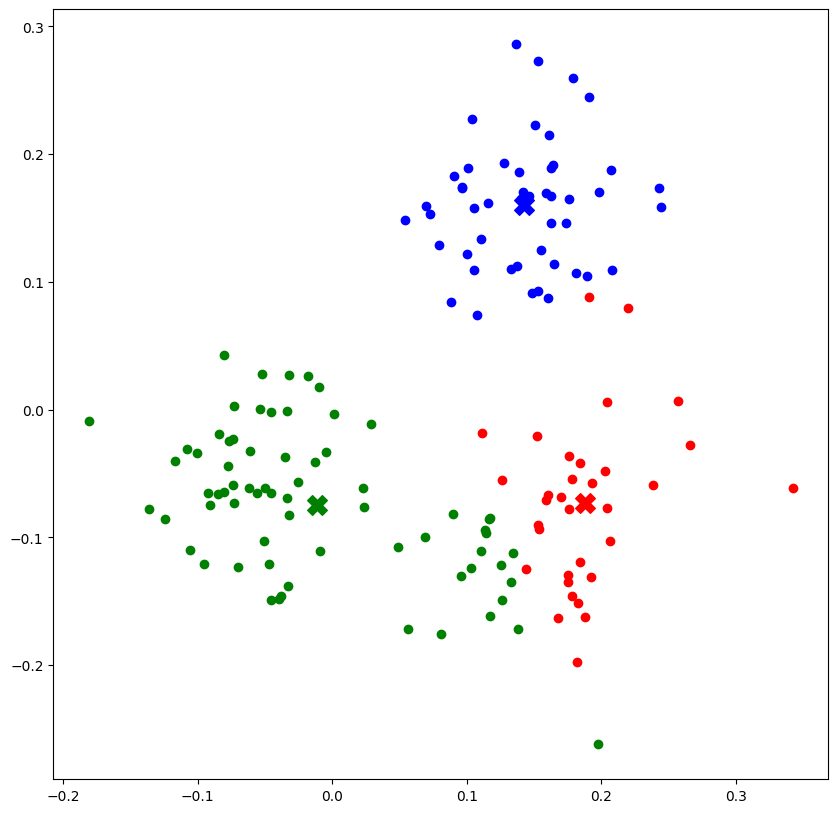

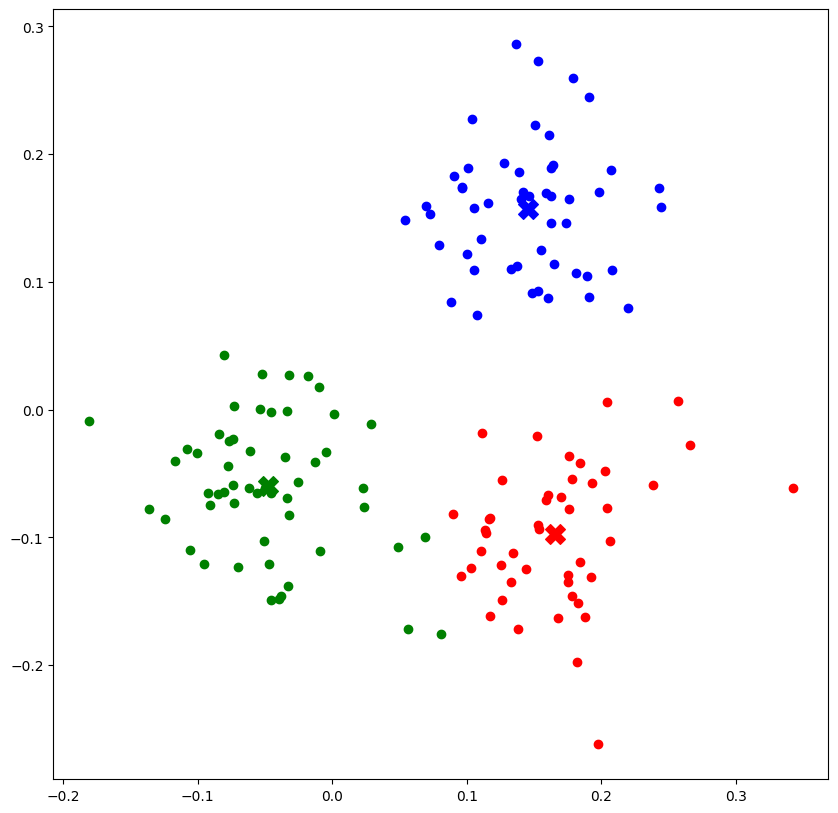

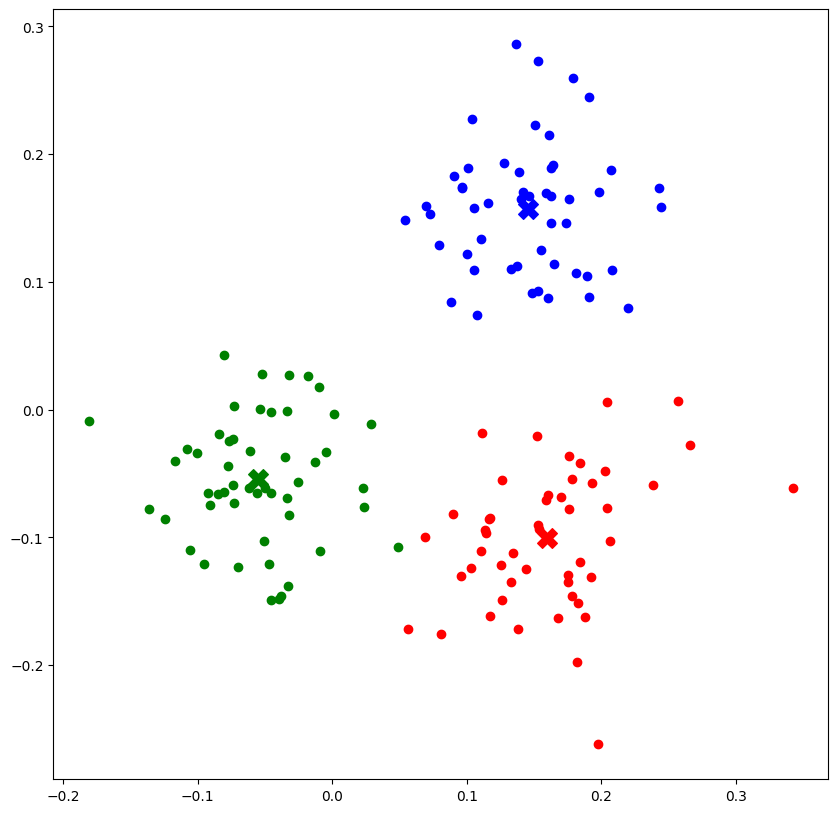

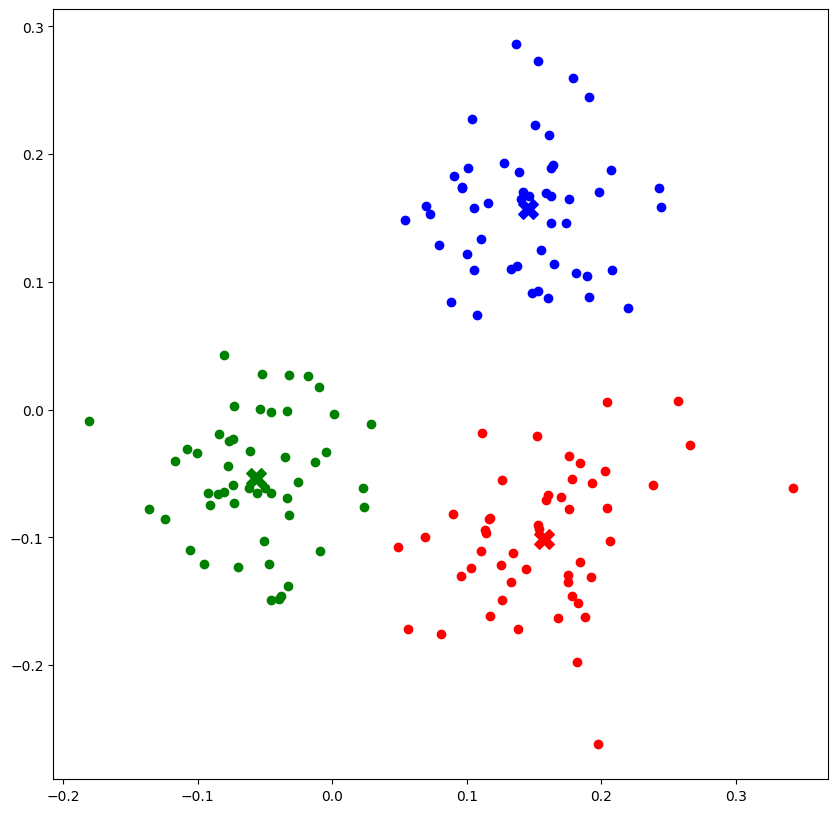

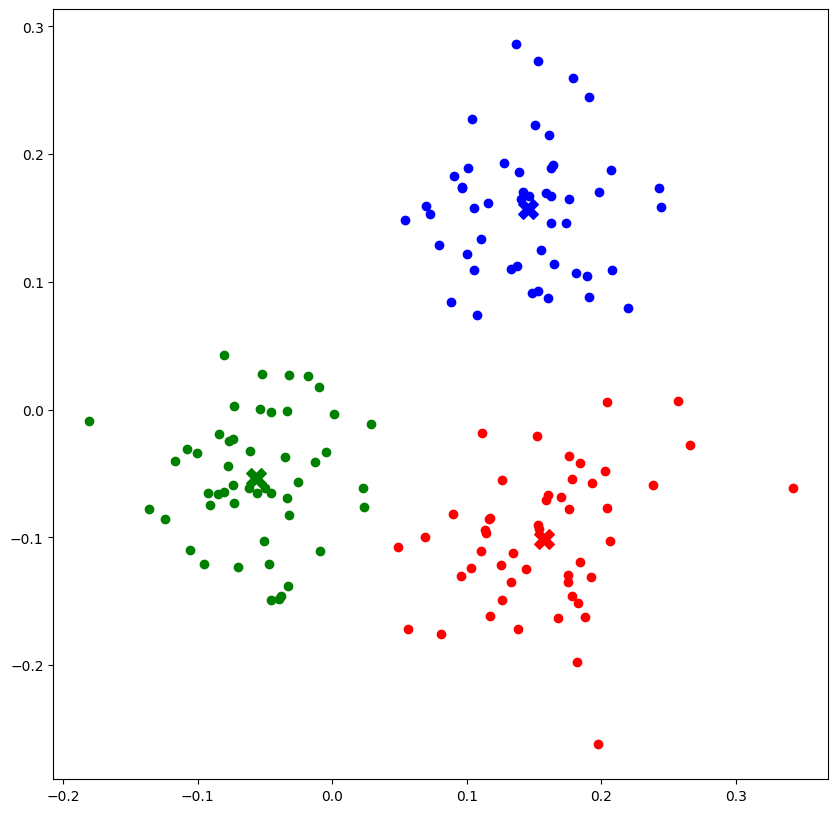

In [37]:
centroids = np.asarray([
    [0.2, 0.3],
    [0.15, 0.31],
    [0.0, 0.0]
])

history = kmeans(data, centroids, visualize=True)

df = pd.DataFrame({'x': data[:,0], 'y': data[:,1]})
for i, assignment in enumerate(history['assignments']):
    df[f'assignment_{i}'] = assignment

df.to_csv('kmeans_bad.csv', index=False)

In [38]:
history['centroids']

[array([[ 0.18519582,  0.16122773],
        [ 0.11974337,  0.19304483],
        [ 0.05859467, -0.05435177]]),
 array([[ 0.18840449,  0.11483703],
        [ 0.11469427,  0.17773744],
        [ 0.0413387 , -0.07975563]]),
 array([[ 0.19482991,  0.08694854],
        [ 0.12354907,  0.18017714],
        [ 0.03752715, -0.08030646]]),
 array([[ 0.19391664,  0.04286014],
        [ 0.13212624,  0.17774387],
        [ 0.02772084, -0.08251238]]),
 array([[ 0.19045201, -0.00154317],
        [ 0.13907921,  0.1710918 ],
        [ 0.01774573, -0.08360889]]),
 array([[ 0.1878155 , -0.07296147],
        [ 0.14271984,  0.16003731],
        [-0.01085307, -0.07473758]]),
 array([[ 0.16568615, -0.09778485],
        [ 0.14522736,  0.1570031 ],
        [-0.04783942, -0.05990524]]),
 array([[ 0.15976899, -0.10092557],
        [ 0.14522736,  0.1570031 ],
        [-0.05471463, -0.05465947]]),
 array([[ 0.15754847, -0.10105884],
        [ 0.14522736,  0.1570031 ],
        [-0.05678378, -0.05360087]]),
 array([[ 

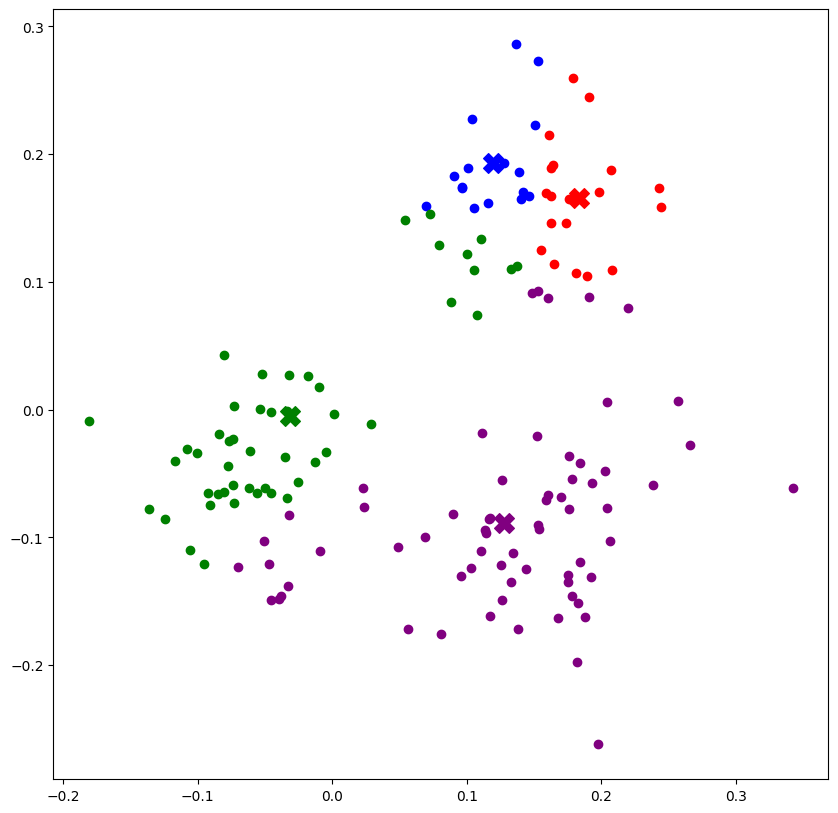

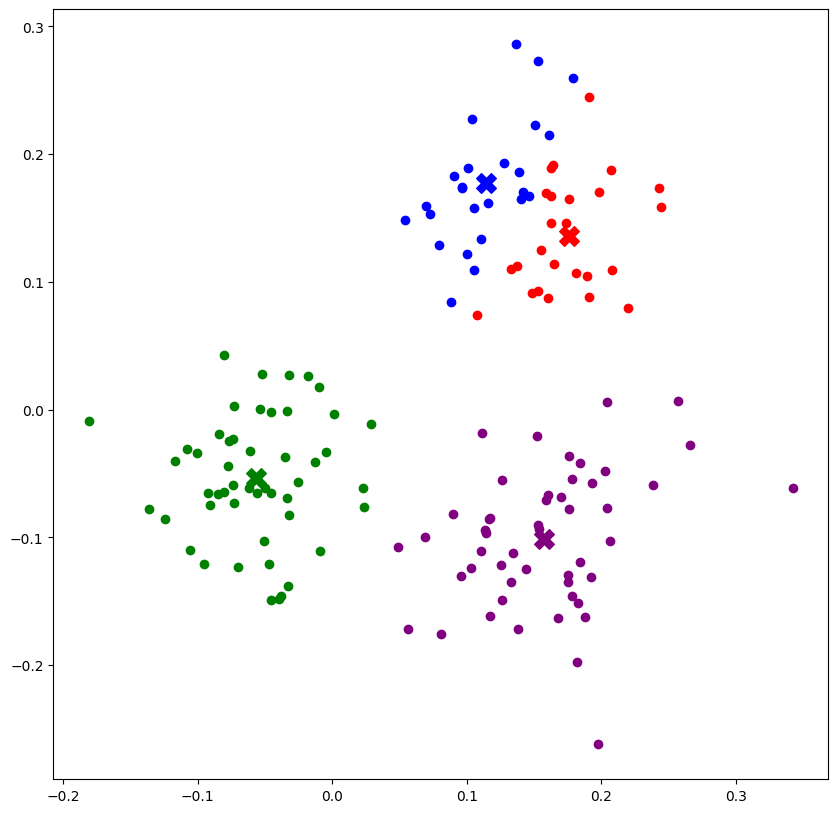

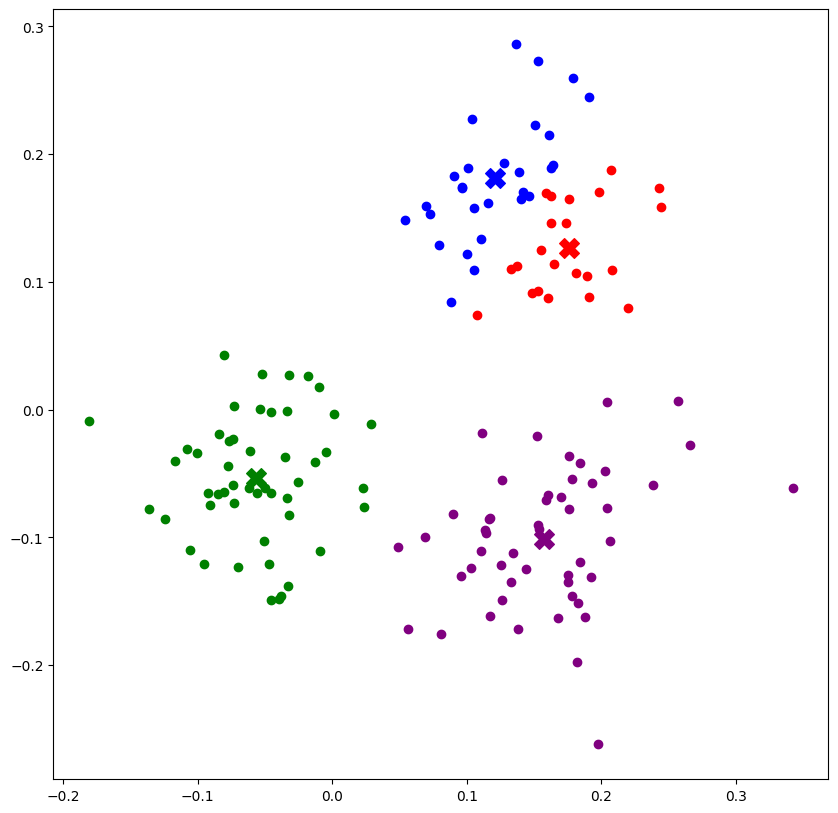

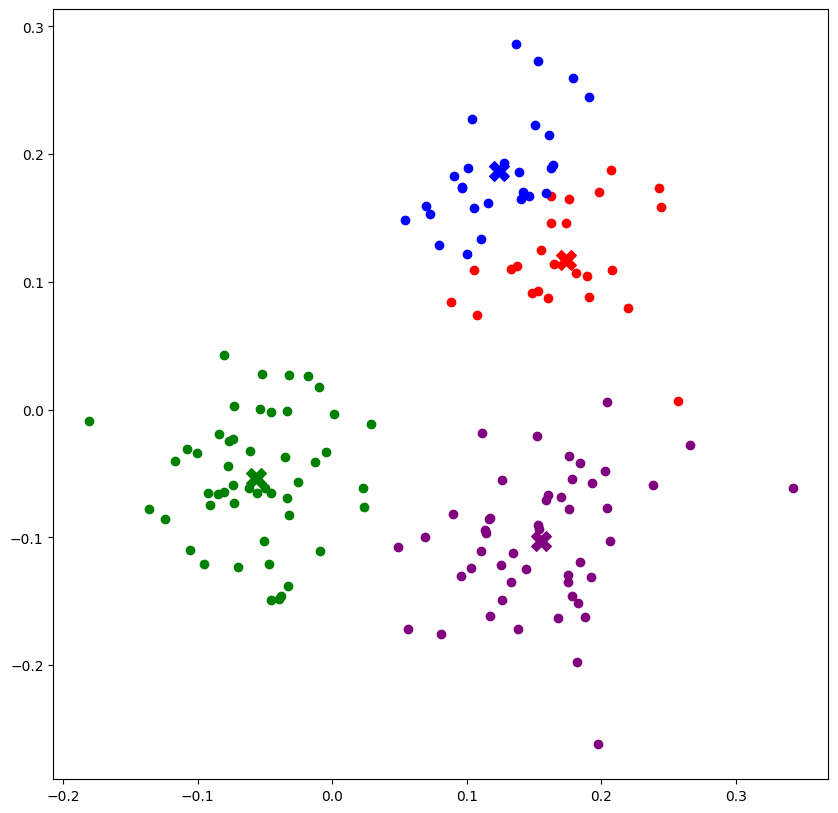

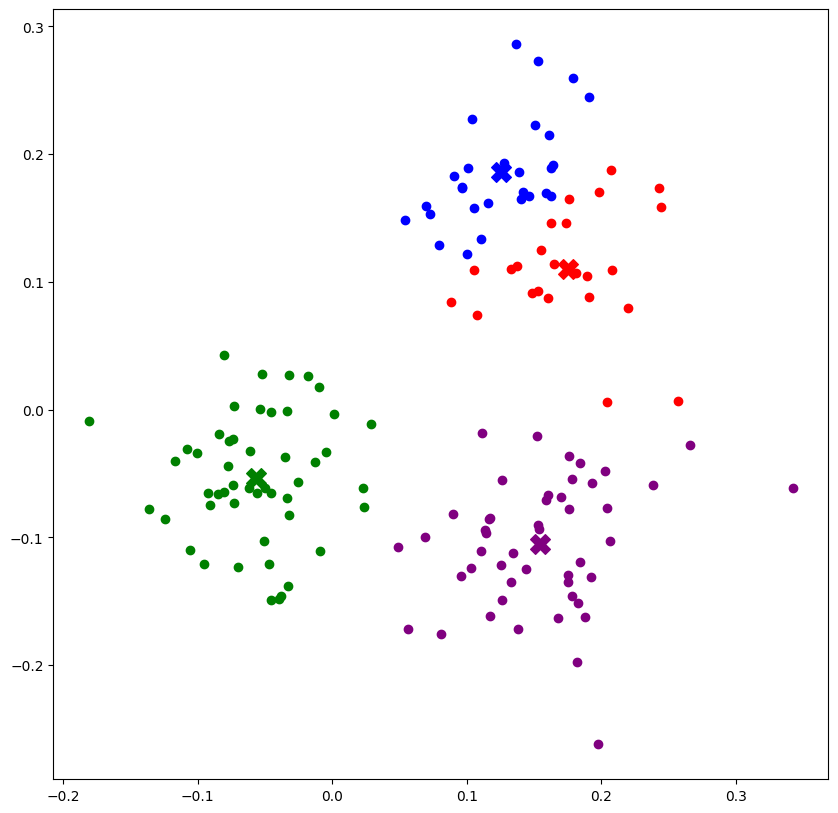

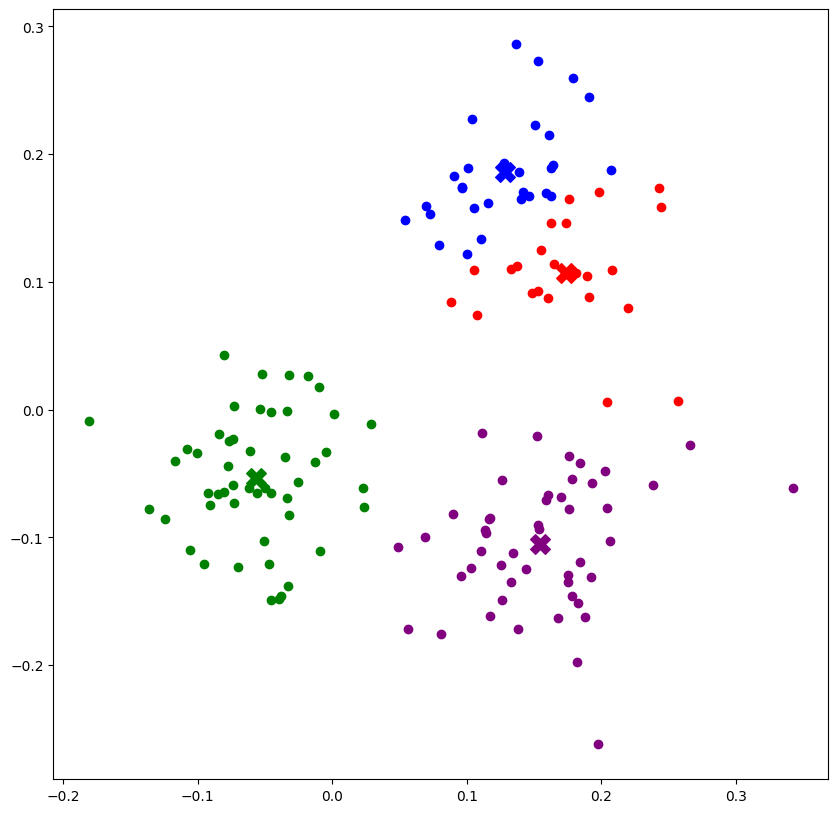

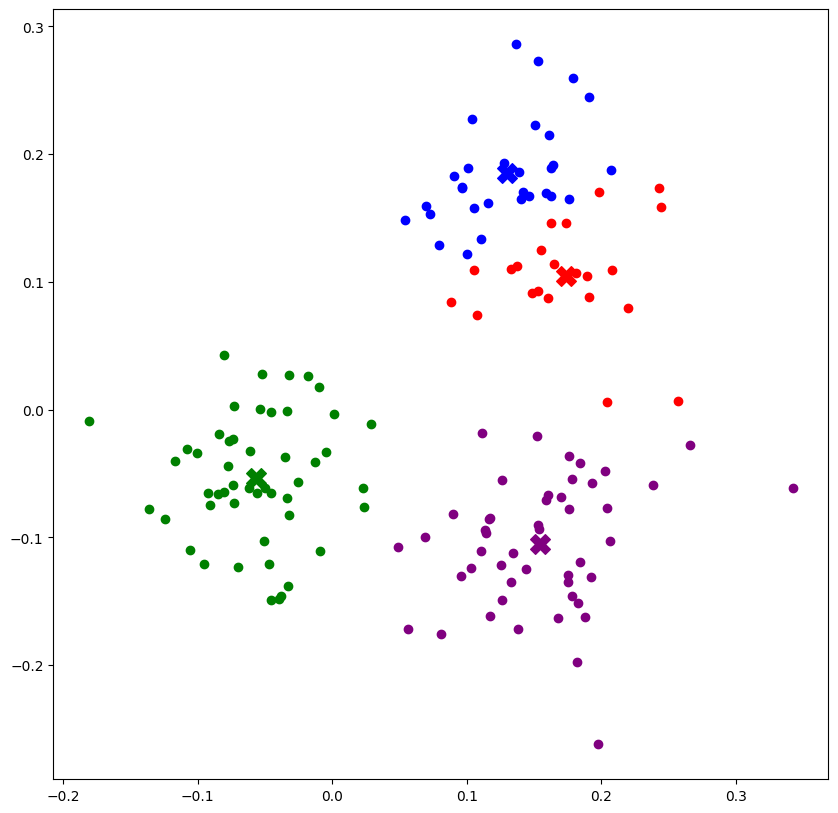

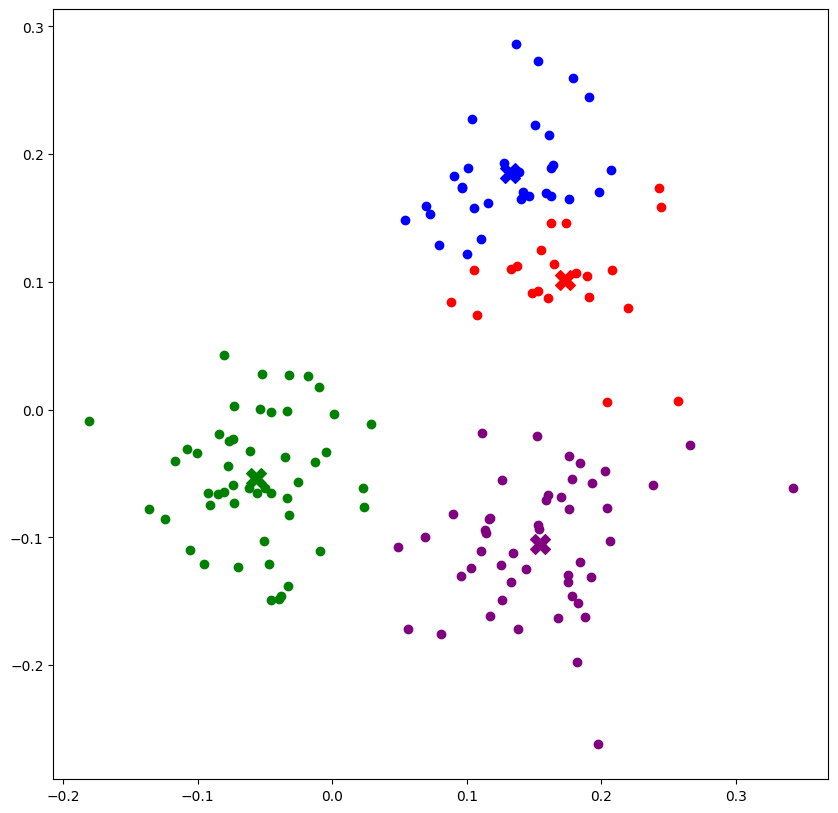

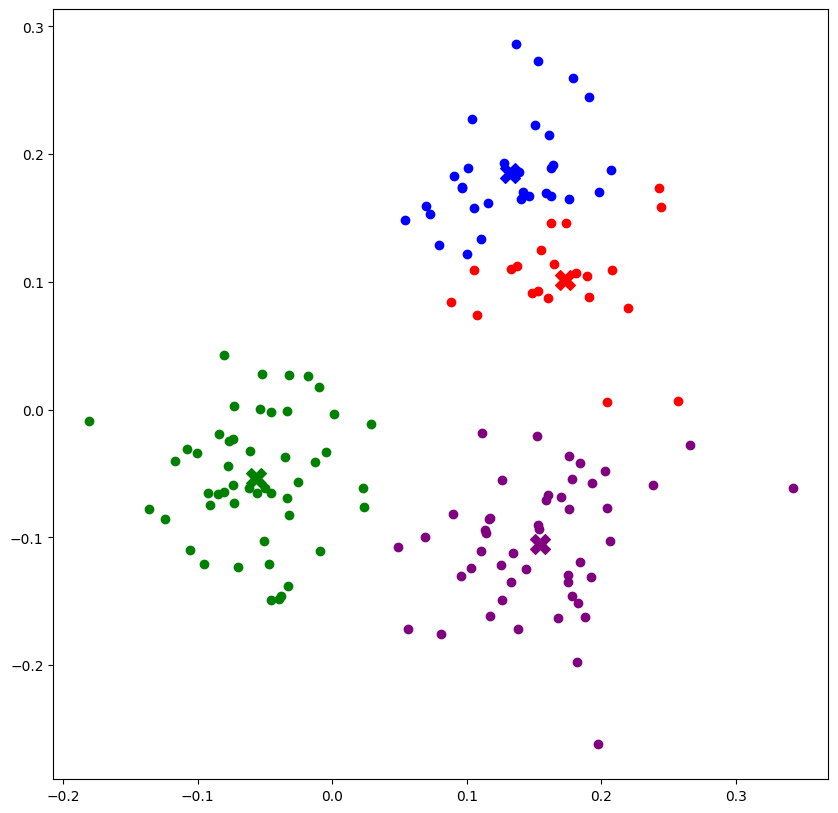

In [41]:
centroids = np.asarray([
    [0.2, 0.3],
    [0.15, 0.31],
    [0.0, 0.0],
    [0.05, -0.05]
])

history = kmeans(data, centroids, visualize=True)

df = pd.DataFrame({'x': data[:,0], 'y': data[:,1]})
for i, assignment in enumerate(history['assignments']):
    df[f'assignment_{i}'] = assignment

df.to_csv('kmeans_four.csv', index=False)

In [42]:
history['centroids']

[array([[ 0.18335666,  0.16550775],
        [ 0.11974337,  0.19304483],
        [-0.0313057 , -0.00499532],
        [ 0.12778653, -0.08896098]]),
 array([[ 0.17576044,  0.13626876],
        [ 0.11469427,  0.17773744],
        [-0.05678378, -0.05360087],
        [ 0.15754847, -0.10105884]]),
 array([[ 0.17618543,  0.1264286 ],
        [ 0.12090316,  0.18102593],
        [-0.05678378, -0.05360087],
        [ 0.15754847, -0.10105884]]),
 array([[ 0.17367893,  0.11716673],
        [ 0.1240841 ,  0.18684464],
        [-0.05678378, -0.05360087],
        [ 0.15551482, -0.10325702]]),
 array([[ 0.17541342,  0.11044946],
        [ 0.12545698,  0.18614742],
        [-0.05678378, -0.05360087],
        [ 0.15450153, -0.10553545]]),
 array([[ 0.17403396,  0.10709523],
        [ 0.12827367,  0.18619739],
        [-0.05678378, -0.05360087],
        [ 0.15450153, -0.10553545]]),
 array([[ 0.17394018,  0.10447005],
        [ 0.12986779,  0.18548578],
        [-0.05678378, -0.05360087],
        [ 0.1545